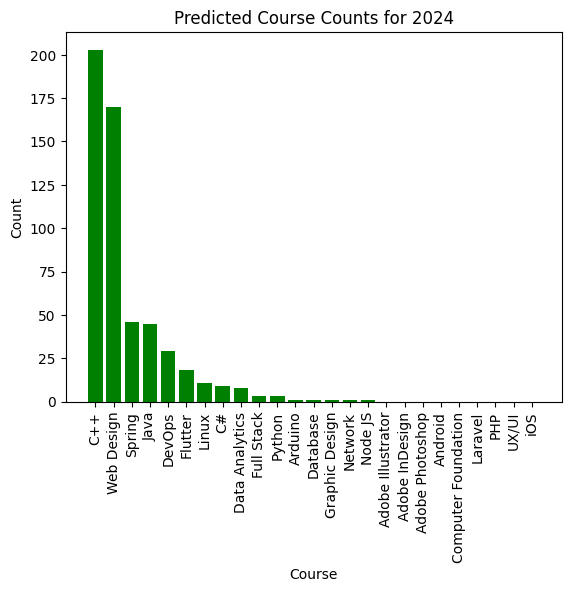

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt

df = pd.read_csv('groupedby_year_and_course.csv')

years = df['Academic Year']
courses = df.columns[1:]
data = df.iloc[:, 1:].values

label_encoder = LabelEncoder()
encoded_courses = label_encoder.fit_transform(courses)

predicted_counts = {}
for i, course in enumerate(courses):
    course_data = data[:, i]
    model = ARIMA(course_data, order=(0, 1, 0))
    model_fit = model.fit()
    prediction = model_fit.predict(start=len(course_data), end=len(course_data))
    predicted_count = int(round(prediction[0]))
    decoded_course = label_encoder.inverse_transform([encoded_courses[i]])[0]
    predicted_counts[decoded_course] = predicted_count

sorted_predicted_counts = sorted(predicted_counts.items(), key=lambda x: x[1], reverse=True)

# print("Predicted course counts for 2024:")
# for course, count in sorted_predicted_counts:
#     print(f"Course: {course}, Count: {count}")

categories = [course[0] for course in sorted_predicted_counts]
counts = [course[1] for course in sorted_predicted_counts]

plt.bar(categories, counts, color="green")
plt.xlabel('Course')
plt.ylabel('Count')
plt.title('Predicted Course Counts for 2024')
plt.xticks(rotation=90)
plt.show()

In [10]:
data = {
    "Course": categories, 
    "Frequency": counts
}
data_frame = pd.DataFrame(data)
data_frame.to_csv("ARIMA.csv", index=False)

In [32]:
import pandas as pd

df = pd.read_csv('groupedby_year_and_course.csv')

# Count the number of courses in each year
del df[df.columns[0]]
course_counts = df.sum()



course_counts_df = pd.DataFrame({'Course': course_counts.index, 'Count': course_counts.values})
course_counts_df = course_counts_df.sort_values(by='Count', ascending=False)

course_counts_df.to_csv("groupedby_year_and_course_data_frame.csv", index=False)